In [ ]:
!pip install datasets

# Step 3: If you're using Hugging Face Datasets, register the dataset
from datasets import Dataset

# Load the saved CSV file
train_dataset = Dataset.from_csv('train_dataset.csv')
train_dataset

validation_dataset = Dataset.from_csv('validation_dataset.csv')
validation_dataset


  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/95/fc/661a7f06e8b7d48fcbd3f55423b7ff1ac3ce59526f146fda87a1e1788ee4/datasets-2.18.0-py3-none-any.whl.metadata
  Using cached datasets-2.18.0-py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for pyarrow>=12.0.0 from https://files.pythonhosted.org/packages/fd/12/e8f27c60e75ddb562b0258db472f3e49253eca2f169fb2665738035566dd/pyarrow-15.0.2-cp38-cp38-manylinux_2_28_x86_64.whl.metadata
  Using cached pyarrow-15.0.2-cp38-cp38-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Obtaining dependency information for pyarrow-hotfix from https://files.pythonhosted.org/packages/e4/f4/9ec2222f5f5f8ea04f66f184caafd991a39c8782e31f5b0266f101cb68ca/pyarrow_hotfix-0.6-py3-none-any.whl.metadata
  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/ad/80/8fc9a4d76b259c901f2c85ed10f330a8fb51993a577bd

Dataset({
    features: ['reviewText', 'overall'],
    num_rows: 600
})

In [ ]:
train_dataset

validation_dataset

test_dataset

from datasets import DatasetDict, load_dataset

# Create a DatasetDict with train and validation splits
split_dataset = DatasetDict({'train': train_dataset, 'validation': validation_dataset, 'test': test_dataset})


split_dataset

DatasetDict({
    train: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 3997
    })
    validation: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 600
    })
})

In [ ]:
!pip install transformers[torch]

  Obtaining dependency information for transformers[torch] from https://files.pythonhosted.org/packages/15/fc/7b6dd7e1adc0a6407b845ed4be1999e98b6917d0694e57316d140cc85484/transformers-4.39.3-py3-none-any.whl.metadata
  Using cached transformers-4.39.3-py3-none-any.whl.metadata (134 kB)
  Obtaining dependency information for regex!=2019.12.17 from https://files.pythonhosted.org/packages/eb/10/4ccc8eed80f11c082a2883d49d4090aa80c7f65704216a529f490cb089b1/regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached regex-2023.12.25-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/0e/d7/3220a4483d240180d0b9423206cc57a4997fd4b49a8393e5ce9a2f7908a9/tokenizers-0.15.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tokenizers-0.15.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadat

In [ ]:
!pip install evaluate accelerate

  Obtaining dependency information for evaluate from https://files.pythonhosted.org/packages/70/63/7644a1eb7b0297e585a6adec98ed9e575309bb973c33b394dae66bc35c69/evaluate-0.4.1-py3-none-any.whl.metadata
  Using cached evaluate-0.4.1-py3-none-any.whl.metadata (9.4 kB)
  Obtaining dependency information for responses<0.19 from https://files.pythonhosted.org/packages/79/f3/2b3a6dc5986303b3dd1bbbcf482022acb2583c428cd23f0b6d37b1a1a519/responses-0.18.0-py3-none-any.whl.metadata
  Using cached responses-0.18.0-py3-none-any.whl.metadata (29 kB)
Using cached evaluate-0.4.1-py3-none-any.whl (84 kB)
Using cached responses-0.18.0-py3-none-any.whl (38 kB)


In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2", padding=True)
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["reviewText"], truncation=True)

# Now you can use the .map() method on the train_dataset
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/3997 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets = tokenized_datasets.rename_column("overall", "labels")
tokenized_datasets


DatasetDict({
    train: Dataset({
        features: ['reviewText', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 3997
    })
    validation: Dataset({
        features: ['reviewText', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['reviewText', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 600
    })
})

In [ ]:
# Extract review texts from validation and test of dataset
review_texts_validation = tokenized_datasets['validation']['reviewText']
reviews_texts_test = tokenized_datasets['test']['reviewText']


In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["reviewText"])


In [ ]:
# Extract actual labels from the validation split of the tokenized datasets
actual_labels_validation = tokenized_datasets['validation']['labels']
actual_labels_test= tokenized_datasets['test']['labels']


In [ ]:
tokenized_datasets = tokenized_datasets.with_format("torch")

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
#from transformers import GPT2Model, TrainingArguments, Trainer
#import torch
from transformers import GPT2ForSequenceClassification, TrainingArguments, Trainer
#model = GPT2Model.from_pretrained("openai-community/gpt2", num_labels=5)
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=5)
model.config.pad_token_id = model.config.eos_token_id

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=3,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

/opt/conda/envs/sagemaker-distribution/lib/python3.8/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
Detected kernel version 4.14.336, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Epoch,Training Loss,Validation Loss,Accuracy
1,1.040800,0.940508,0.617000
2,0.828600,0.913622,0.656000
3,0.745100,1.113774,0.645000
4,0.726500,1.608073,0.637000
5,0.555700,2.131713,0.639000
6,0.391000,2.785541,0.620000
7,0.316800,3.140643,0.633000
8,0.231800,3.389966,0.637000
9,0.139200,3.627032,0.633000
10,0.090300,3.759121,0.634000


TrainOutput(global_step=13330, training_loss=0.5199130671416023, metrics={'train_runtime': 3867.2771, 'train_samples_per_second': 10.335, 'train_steps_per_second': 3.447, 'total_flos': 6878254234406400.0, 'train_loss': 0.5199130671416023, 'epoch': 10.0})

In [ ]:
# Generate predictions for the validation dataset
predictions_validation = trainer.predict(tokenized_datasets['validation'])

# Extract predicted labels from the predictions
predicted_labels_validation = np.argmax(predictions_validation.predictions, axis=-1)

# You can now use the predicted_labels array for further analysis or evaluation


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming true labels for the validation dataset are stored in true_labels_validation variable

# Calculate accuracy
accuracy = accuracy_score(actual_labels_validation, predicted_labels_validation)

# Calculate F1 score
f1 = f1_score(actual_labels_validation, predicted_labels_validation, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.656
F1 Score: 0.6377681792509443


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


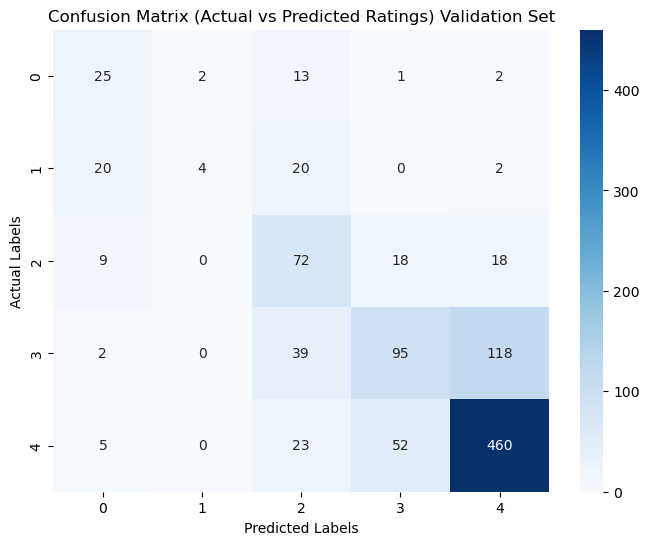

In [ ]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(pd.Series(actual_labels_validation, name='Actual'), pd.Series(predicted_labels_validation, name='Predicted'))

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix (Actual vs Predicted Ratings) Validation Set')
plt.show()


In [ ]:
# Create DataFrame with review text, actual label, and predicted label
df_results = pd.DataFrame({
    'Review Text': review_texts_validation,
    'Actual Label': actual_labels_validation,
    'Predicted Label': predicted_labels_validation
})

# Display the DataFrame
print(df_results)


                                           Review Text  Actual Label  \
0    I expected a decent book only to be given less...             0   
1    This was a very good book, I was glad I bought...             4   
2    An interesting book from both a literary and h...             3   
3    Interesting, fun, good light read.  I really e...             2   
4    Some students spend too many hours practicing....             2   
..                                                 ...           ...   
995  Excellent follow up to the story, can't wait f...             4   
996  Title: A Beautiful LiarAuthor: Leanna HarrowRe...             4   
997  John Rain seems to be more doubtful of his rol...             4   
998  As I type this, I've already started in on the...             3   
999  I love how this book presents and details all ...             4   

     Predicted Label  
0                  2  
1                  4  
2                  3  
3                  3  
4                  4

In [ ]:
# Specify the path where you want to save the CSV file
file_path = "GPT2_Final_Validation.csv"

# Save the DataFrame to a CSV file
df_results.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

print(f"DataFrame saved to {file_path}")


DataFrame saved to GPT2_Final_Validation.csv


In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 3997
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 600
    })
})

In [ ]:
# Generate predictions for the validation dataset
predictions_test = trainer.predict(tokenized_datasets['test'])

# Extract predicted labels from the predictions
predicted_labels_test = np.argmax(predictions_test.predictions, axis=-1)

# You can now use the predicted_labels array for further analysis or evaluation


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming true labels for the validation dataset are stored in true_labels_validation variable

# Calculate accuracy
accuracy = accuracy_score(actual_labels_test, predicted_labels_test)

# Calculate F1 score
f1 = f1_score(actual_labels_test, predicted_labels_test, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.7783333333333333
F1 Score: 0.7601564842235785


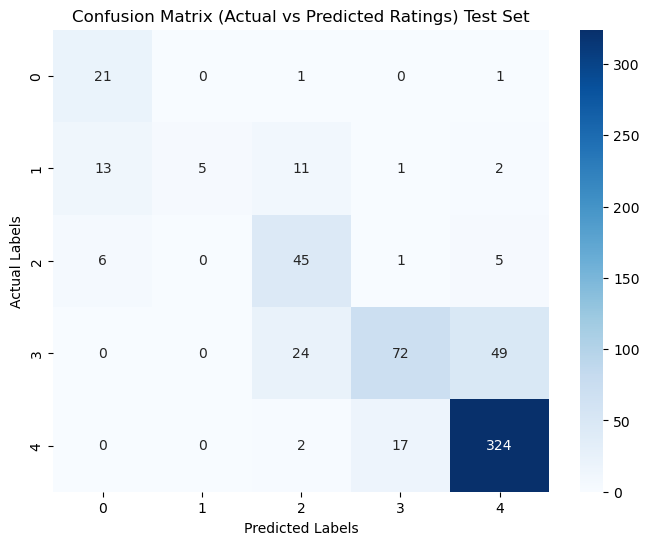

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(pd.Series(actual_labels_test, name='Actual'), pd.Series(predicted_labels_test, name='Predicted'))

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix (Actual vs Predicted Ratings) Test Set')
plt.show()


In [ ]:
# Create DataFrame with review text, actual label, and predicted label
df_results = pd.DataFrame({
    'Review Text': reviews_texts_test,
    'Actual Label': actual_labels_test,
    'Predicted Label': predicted_labels_test
})

# Display the DataFrame
print(df_results)


                                           Review Text  Actual Label  \
0    Never saw this coming... Omg it was better tha...             4   
1    I loved this book. I loved it because it's wel...             4   
2    Much of what is in this book is common sense, ...             3   
3    Fans of the author and those who appreciate a ...             4   
4    This is the perfect summer read. The story tak...             3   
..                                                 ...           ...   
595  This is only my second Cornwell novel, and I h...             4   
596  Sharnael wrote "Keys to Third Heaven" after at...             4   
597  Cristin Harber has completely captivated me wi...             3   
598  So far, it has not helped my problems.  Thankf...             2   
599  The thing I loved about this book was how I di...             4   

     Predicted Label  
0                  4  
1                  4  
2                  4  
3                  4  
4                  3

In [ ]:
# Specify the path where you want to save the CSV file
file_path = "GPT2_Final_Test.csv"

# Save the DataFrame to a CSV file
df_results.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

print(f"DataFrame saved to {file_path}")


DataFrame saved to GPT2_Final_Test.csv
